In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data
clust_data=pd.read_csv(r'C:\Users\gauta\OneDrive\Documents\UpGrad\Clustering\Country-data.csv')
clust_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
clust_data.shape

(167, 10)

## Data Quality check

In [4]:
#checking for missing values
clust_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
clust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
#converting the exports, health, imports columns into absolute values
clust_data['exports']=(clust_data['exports']*clust_data['gdpp'])/100
clust_data['health']=(clust_data['health']*clust_data['gdpp'])/100
clust_data['imports']=(clust_data['imports']*clust_data['gdpp'])/100

## Outlier Treatment                  

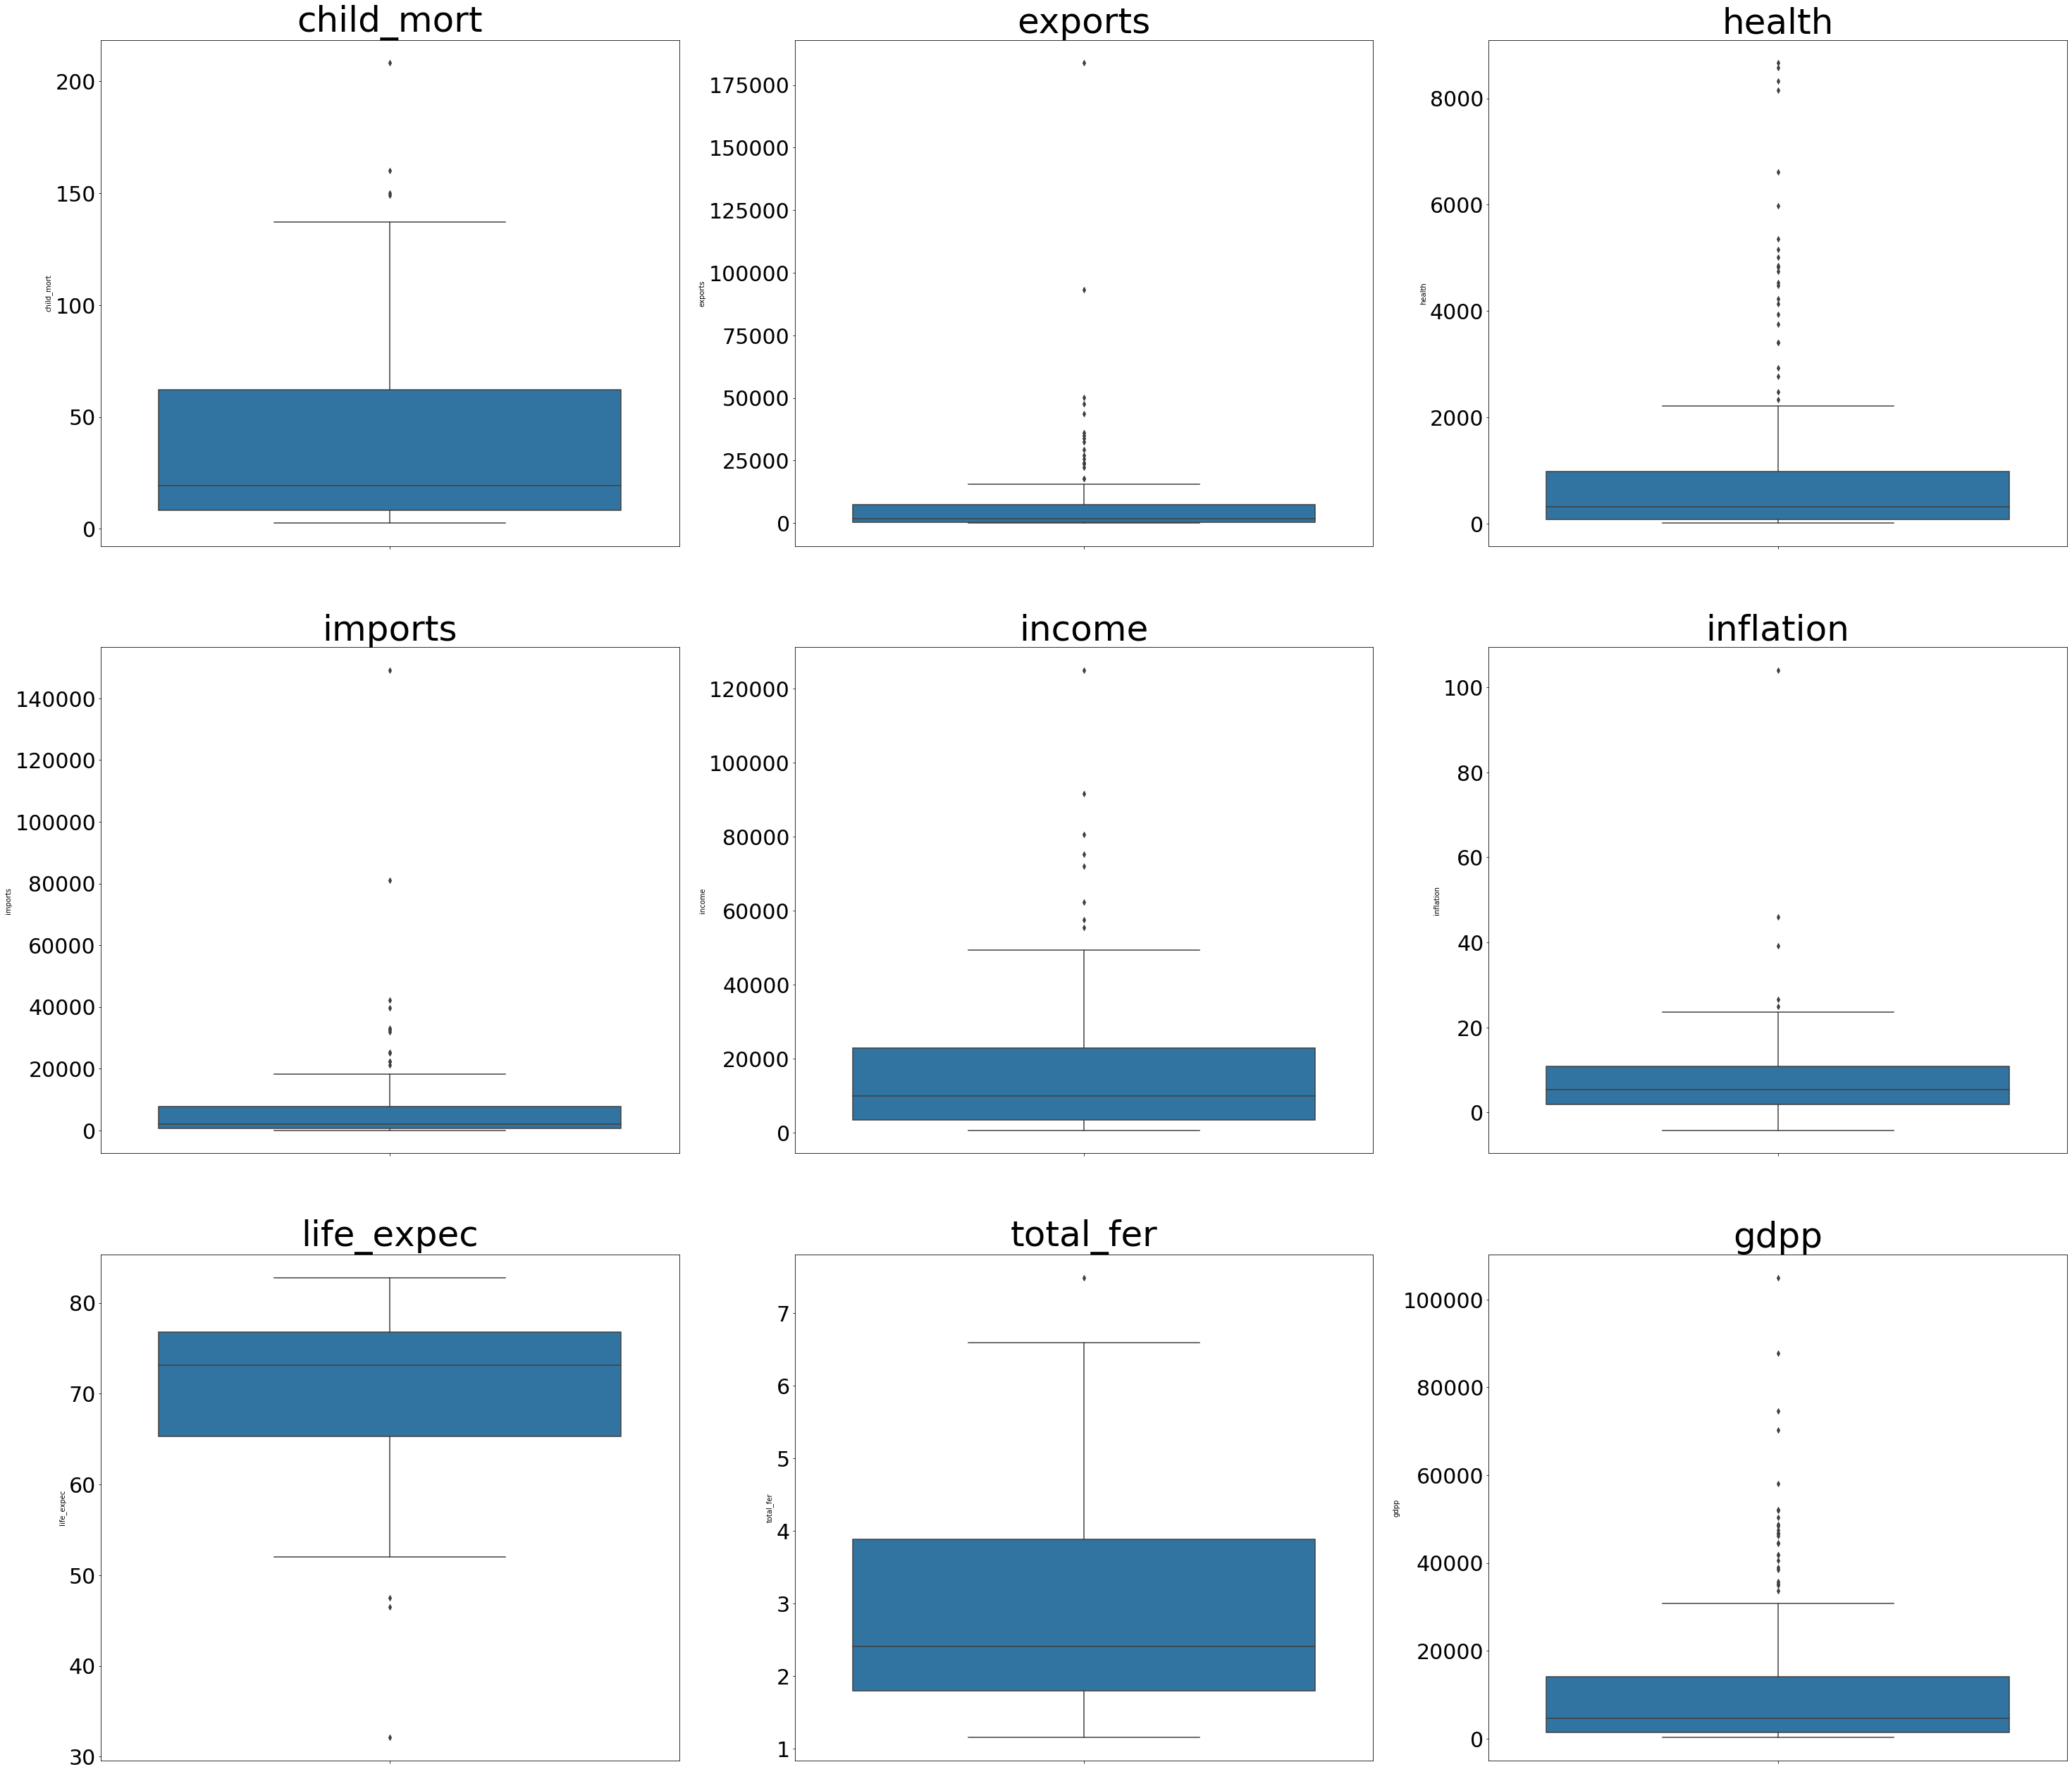

In [7]:
#Outliers check using the box plots
plt.figure(figsize=[50,140])
columns=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in range(1,len(columns)+1):
    plt.subplot(9,3,i)
    plt.title(columns[i-1],fontdict={'fontsize':50})
    plt.yticks(fontsize=30)
    sns.boxplot(clust_data[columns[i-1]],orient='v')

In [8]:
#viewing different percentiles of the data
clust_data.describe(percentiles=[0,0.25,0.5,0.75,0.9,0.95,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
0%,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


In [9]:
#checking for the correlation
clust_data.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [10]:
#Outliers treatment

cluster_columns=['exports','health','imports','income','life_expec','gdpp']
for i in cluster_columns:
    q1=clust_data[i].quantile(0.01)
    q2=clust_data[i].quantile(0.95)
    clust_data[i][clust_data[i]<=q1]=q1
    clust_data[i][clust_data[i]>=q2]=q2

C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\gauta\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWi

In [11]:
clust_data.describe(percentiles=[0,0.25,0.5,0.75,0.9,0.95,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,5783.251215,954.046177,5140.799750,15739.811257,7.781832,70.616287,2.947964,11999.456527
std,40.328931,8579.961446,1453.404740,6695.667657,14786.078083,10.570704,8.515918,1.513848,15157.723194
min,2.600000,22.243716,17.009362,104.909640,742.240000,-4.210000,47.160000,1.150000,331.620000
0%,2.600000,22.243716,17.009362,104.909640,742.240000,-4.210000,47.160000,1.150000,331.620000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,30756.570000,4931.330700,23694.552000,47513.000000,20.870000,81.400000,5.861000,48547.000000


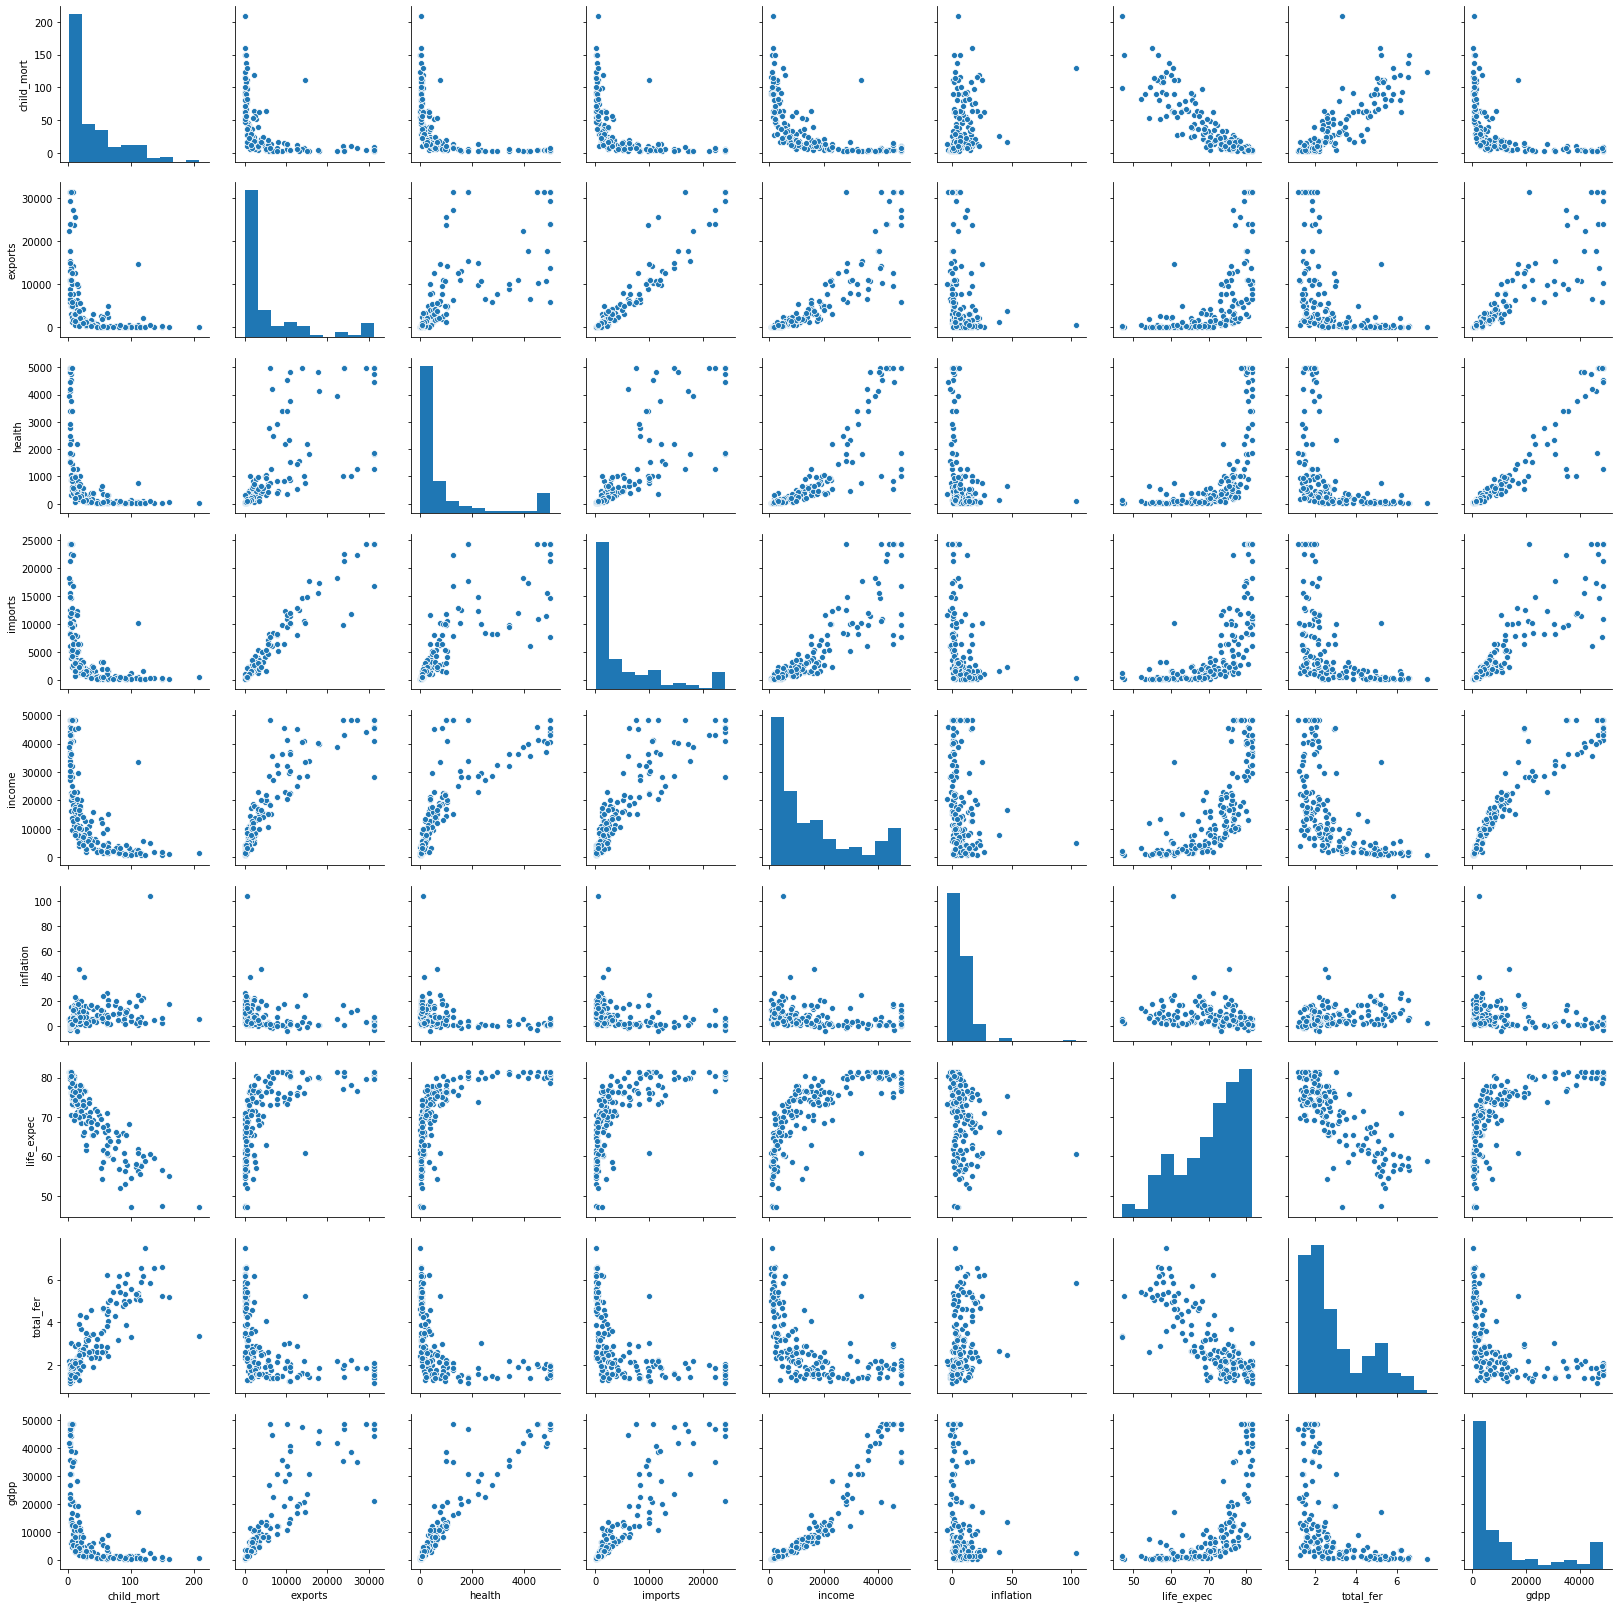

In [12]:
#Pairplot of the data
sns.pairplot(clust_data)

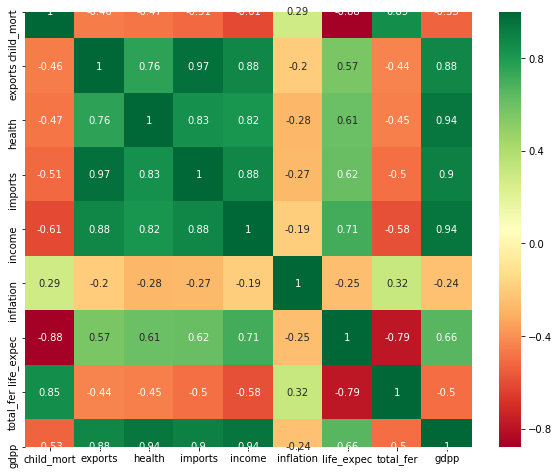

In [13]:
#heatmap to visualise the correlation
plt.figure(figsize=([10,8]))
sns.heatmap(clust_data.corr(),cmap='RdYlGn',annot=True)

## Hopkins Test 

In [14]:
#Hopkins test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [15]:
#checking for hopkins value
hopkins(clust_data.drop(columns=['country']))

0.9017240895084107

## Scaling

In [16]:
#importing the scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [17]:
#Reseting the index
clust_data.set_index('country',inplace=True)
clust_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [18]:
#Fitting and scaling the data
clust_data_scaled=scaler.fit_transform(clust_data)
clust_data_scaled=pd.DataFrame(clust_data_scaled,columns=['Child_Mortality','Exports','Helath','Imports','Income','Inflation','Life_Expectancy','Total_Fer','GDPP'])
clust_data_scaled.index=clust_data.index
clust_data_scaled.head()

,Child_Mortality,Exports,Helath,Imports,Income,Inflation,Life_Expectancy,Total_Fer,GDPP
country,,,,,,,,,
Afghanistan,0.426485,0.001054,0.005032,0.005941,0.018250,0.126144,0.264019,0.736593,0.004585
Albania,0.068160,0.035805,0.050687,0.078007,0.193232,0.080399,0.851051,0.078864,0.077848
Algeria,0.120253,0.053898,0.034138,0.053675,0.255696,0.187691,0.856893,0.274448,0.085512
Angola,0.566699,0.069412,0.016889,0.058395,0.108475,0.245911,0.377921,0.790221,0.066249
Antigua and Barbuda,0.037488,0.176284,0.145191,0.293367,0.386091,0.052213,0.865654,0.154574,0.245832


## Find the best value of k: Silhoutte Score and SSD Elbow 

In [19]:
#importing required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

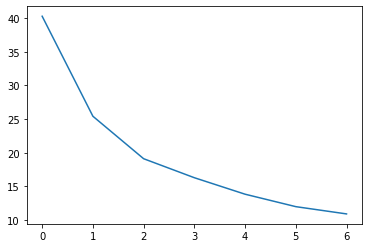

In [20]:
#elbow curve/ssd
ssd=[]
num_clusters=[2,3,4,5,6,7,8]
for clust in num_clusters:
    kmeans=KMeans(n_clusters=clust,max_iter=50)
    kmeans.fit(clust_data_scaled)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)

In [21]:
# silhouette analysis
for score in num_clusters:
    kmeans=KMeans(n_clusters=score,max_iter=50)
    kmeans.fit(clust_data_scaled)
    clust_label=kmeans.labels_
    silhouette_avg=silhouette_score(clust_data_scaled,clust_label)
    print('for n={} clusters, the score is {}'.format(score,silhouette_avg))

for n=2 clusters, the score is 0.5728797268349743
for n=3 clusters, the score is 0.4539343398274972
for n=4 clusters, the score is 0.43985880352335416
for n=5 clusters, the score is 0.328574733361124
for n=6 clusters, the score is 0.3313153392872588
for n=7 clusters, the score is 0.3576853029478224
for n=8 clusters, the score is 0.30958277417377217


##  Final model with k=4 

In [22]:
# final model with k=4
kmeans=KMeans(n_clusters=4,max_iter=50)
kmeans.fit(clust_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 3, 1, 0, 3, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 3, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3, 3,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 3, 2, 2, 0, 1, 2, 3, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 3, 3, 0, 3, 0, 0, 2, 2, 3, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 3, 2, 2, 1, 3, 2, 0, 0, 0, 0, 0, 3, 1, 0, 0, 2, 0, 3, 2, 0, 0,
       2, 1, 3, 3, 2, 2, 3, 3, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 3, 3, 0, 0, 2, 0, 0, 2, 2])

In [24]:
#assign the labels
clust_data_scaled['Labels']=kmeans.labels_
clust_data_scaled.head()

,Child_Mortality,Exports,Helath,Imports,Income,Inflation,Life_Expectancy,Total_Fer,GDPP,Labels
country,,,,,,,,,,
Afghanistan,0.426485,0.001054,0.005032,0.005941,0.018250,0.126144,0.264019,0.736593,0.004585,2
Albania,0.068160,0.035805,0.050687,0.078007,0.193232,0.080399,0.851051,0.078864,0.077848,0
Algeria,0.120253,0.053898,0.034138,0.053675,0.255696,0.187691,0.856893,0.274448,0.085512,0
Angola,0.566699,0.069412,0.016889,0.058395,0.108475,0.245911,0.377921,0.790221,0.066249,2
Antigua and Barbuda,0.037488,0.176284,0.145191,0.293367,0.386091,0.052213,0.865654,0.154574,0.245832,0


## Visualization of the clusters using scatterplot 

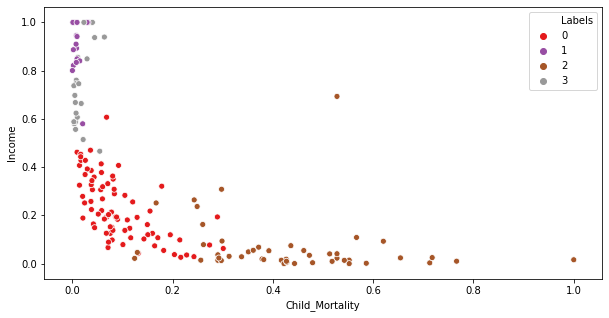

In [25]:
#plot for child_mortality and income
plt.figure(figsize=[10,5])
sns.scatterplot(clust_data_scaled['Child_Mortality'],clust_data_scaled['Income'],hue=clust_data_scaled['Labels'],palette='Set1')

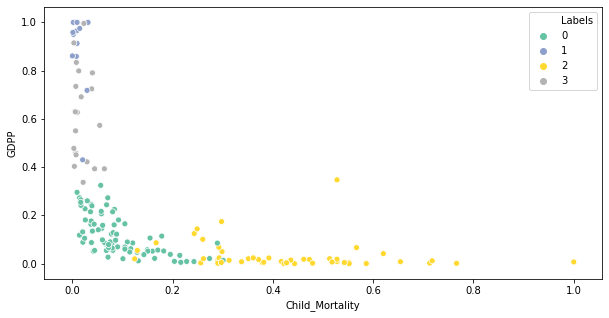

In [26]:
#plot for child mortality and gdpp
plt.figure(figsize=[10,5])
sns.scatterplot(clust_data_scaled['Child_Mortality'],clust_data_scaled['GDPP'],hue=clust_data_scaled['Labels'],palette='Set2')

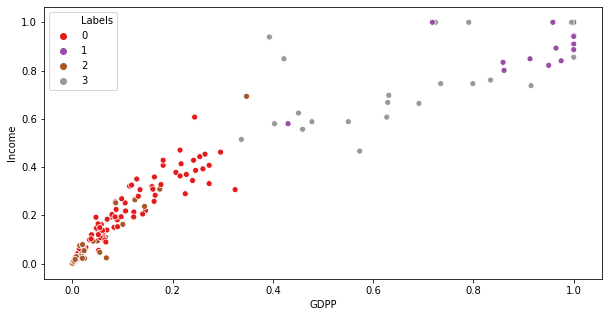

In [27]:
#plot for gdpp and income
plt.figure(figsize=[10,5])
sns.scatterplot(clust_data_scaled['GDPP'],clust_data_scaled['Income'],hue=clust_data_scaled['Labels'],palette='Set1')

## Cluster profiling: gdpp, child_mort and income 

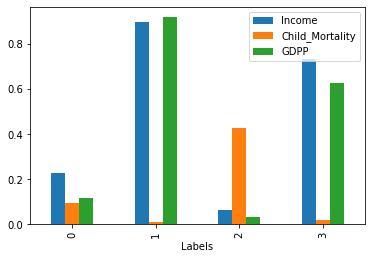

In [28]:
#cluster profiling
clust_data_scaled[['Income','Child_Mortality','GDPP','Labels']].groupby('Labels').mean().plot(kind='bar')

In [32]:
#seperating the countries with lower income, lower gdpp and higher child mortality
count_need=clust_data_scaled.copy()
count_need=count_need[count_need['Labels']==2]
count_need.head()


,Child_Mortality,Exports,Helath,Imports,Income,Inflation,Life_Expectancy,Total_Fer,GDPP,Labels
country,,,,,,,,,,
Afghanistan,0.426485,0.001054,0.005032,0.005941,0.018250,0.126144,0.264019,0.736593,0.004585,2
Angola,0.566699,0.069412,0.016889,0.058395,0.108475,0.245911,0.377921,0.790221,0.066249,2
Benin,0.527751,0.005043,0.002842,0.007336,0.022667,0.047084,0.427570,0.664038,0.008832,2
Botswana,0.242941,0.087567,0.103045,0.130616,0.264108,0.121338,0.290304,0.272871,0.124660,2
Burkina Faso,0.552093,0.002811,0.004393,0.002705,0.014465,0.101839,0.313668,0.744479,0.005041,2


In [33]:
#Finding the bottom 5 countries which needs help
count_need.sort_values(['Income','GDPP','Child_Mortality'],ascending=['True','True','False']).head()

,Child_Mortality,Exports,Helath,Imports,Income,Inflation,Life_Expectancy,Total_Fer,GDPP,Labels
country,,,,,,,,,,
Liberia,0.422103,0.001282,0.004359,0.008199,0.000000,0.089456,0.398364,0.610410,0.000000,2
"Congo, Dem. Rep.",0.552093,0.003668,0.001901,0.002517,0.000000,0.231125,0.301986,0.850158,0.000049,2
Burundi,0.443038,0.000000,0.001977,0.000000,0.000458,0.152574,0.307827,0.805994,0.000000,2
Niger,0.586173,0.001754,0.000191,0.002733,0.001509,0.062471,0.339953,1.000000,0.000339,2
Central African Republic,0.712756,0.000969,0.000150,0.000550,0.003066,0.057481,0.009930,0.640379,0.002369,2


In [34]:
clust_data_scaled.drop(columns=['Labels'],inplace=True)

In [35]:
clust_data_scaled.head()
print(clust_data_scaled.shape)

(167, 9)


## Hierarchial Clustering: Single linkage, Complete linkage, Visualization

In [36]:
#importing required libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

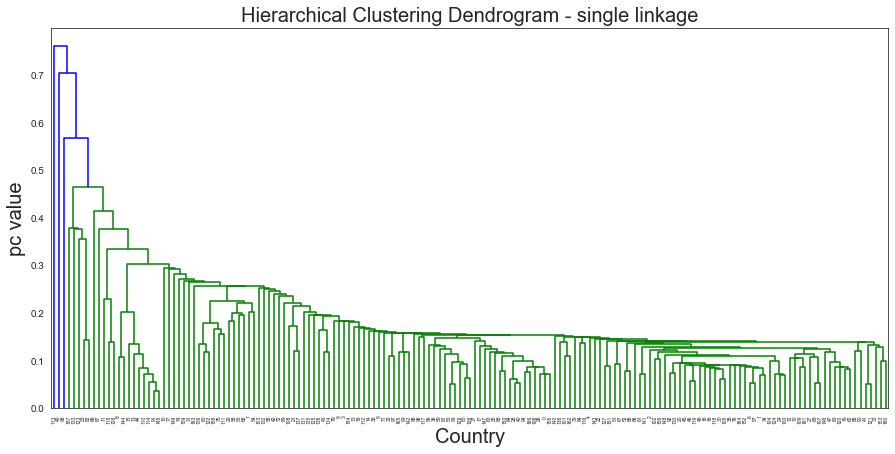

In [37]:
#hierarchial clustering using single linkage
plt.figure(figsize=(15,7))
sns.set_style('white')
plt.title('Hierarchical Clustering Dendrogram - single linkage',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('pc value',fontsize=20)
mergings=linkage(clust_data_scaled,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

In [38]:
# 2 clusters
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
# assign cluster labels
clust_data_scaled['Labels'] = cluster_labels
clust_data_scaled.head()

,Child_Mortality,Exports,Helath,Imports,Income,Inflation,Life_Expectancy,Total_Fer,GDPP,Labels
country,,,,,,,,,,
Afghanistan,0.426485,0.001054,0.005032,0.005941,0.018250,0.126144,0.264019,0.736593,0.004585,0
Albania,0.068160,0.035805,0.050687,0.078007,0.193232,0.080399,0.851051,0.078864,0.077848,0
Algeria,0.120253,0.053898,0.034138,0.053675,0.255696,0.187691,0.856893,0.274448,0.085512,0
Angola,0.566699,0.069412,0.016889,0.058395,0.108475,0.245911,0.377921,0.790221,0.066249,0
Antigua and Barbuda,0.037488,0.176284,0.145191,0.293367,0.386091,0.052213,0.865654,0.154574,0.245832,0


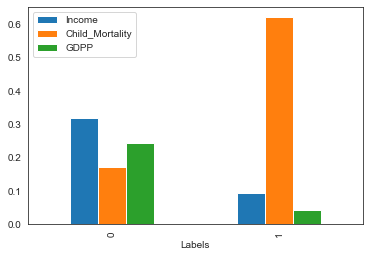

In [40]:
#cluster profiling
clust_data_scaled[['Income','Child_Mortality','GDPP','Labels']].groupby('Labels').mean().plot(kind='bar')

In [41]:
#seperating the countries with lower income, lower gdpp and higher child mortality
single_clust=clust_data_scaled[clust_data_scaled['Labels']==1]

In [42]:
#finding the bottom 5 countries
single_clust.sort_values(['Income','GDPP','Child_Mortality'],ascending=['True','True','False']).head()

,Child_Mortality,Exports,Helath,Imports,Income,Inflation,Life_Expectancy,Total_Fer,GDPP,Labels
country,,,,,,,,,,
Nigeria,0.620253,0.018087,0.02043,0.01245,0.092702,1.0,0.389603,0.739748,0.041393,1


In [43]:
clust_data_scaled.drop(columns=['Labels'],inplace=True)

In [44]:
clust_data_scaled.head()
print(clust_data_scaled.shape)

(167, 9)


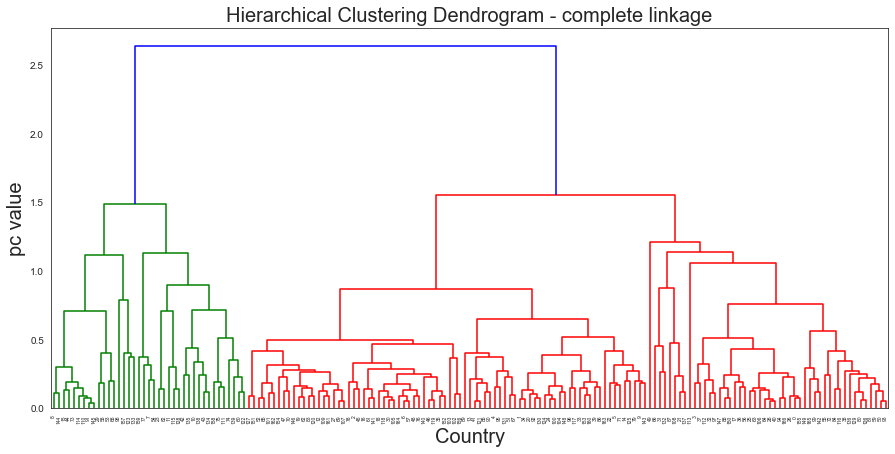

In [45]:
#hierarchial clustering using complete linkage
plt.figure(figsize=(15,7))
sns.set_style('white')
plt.title('Hierarchical Clustering Dendrogram - complete linkage',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('pc value',fontsize=20)
mergings_2=linkage(clust_data_scaled,method='complete',metric='euclidean')
dendrogram(mergings_2)
plt.show()

In [46]:
# 4 clusters
cluster_labels=cut_tree(mergings_2,n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       3, 1, 1, 1, 1, 0, 0, 1, 1, 3, 2, 0, 0, 1, 3, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 3, 1, 1, 1, 0, 3, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       3, 2, 0, 0, 3, 2, 0, 1, 1, 1, 1, 1, 2, 3, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 3, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 3, 3, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 3, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [47]:
## assign cluster labels
clust_data_scaled['Labels']=cluster_labels
clust_data_scaled.head()

,Child_Mortality,Exports,Helath,Imports,Income,Inflation,Life_Expectancy,Total_Fer,GDPP,Labels
country,,,,,,,,,,
Afghanistan,0.426485,0.001054,0.005032,0.005941,0.018250,0.126144,0.264019,0.736593,0.004585,0
Albania,0.068160,0.035805,0.050687,0.078007,0.193232,0.080399,0.851051,0.078864,0.077848,1
Algeria,0.120253,0.053898,0.034138,0.053675,0.255696,0.187691,0.856893,0.274448,0.085512,1
Angola,0.566699,0.069412,0.016889,0.058395,0.108475,0.245911,0.377921,0.790221,0.066249,0
Antigua and Barbuda,0.037488,0.176284,0.145191,0.293367,0.386091,0.052213,0.865654,0.154574,0.245832,1


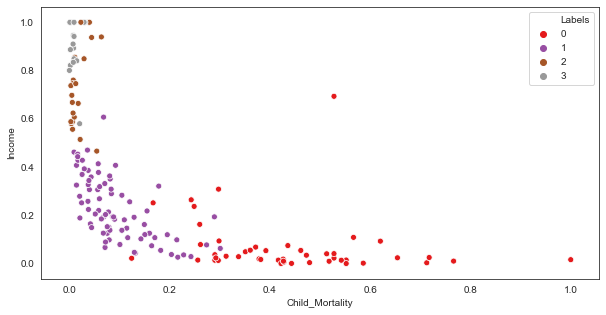

In [48]:
#plot for child_mortality and income
plt.figure(figsize=[10,5])
sns.scatterplot(clust_data_scaled['Child_Mortality'],clust_data_scaled['Income'],hue=clust_data_scaled['Labels'],palette='Set1')

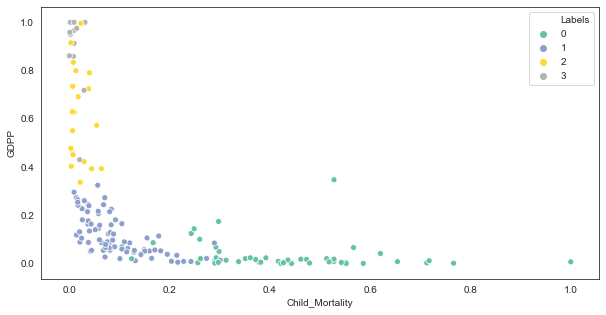

In [49]:
#plot for child mortality and gdpp
plt.figure(figsize=[10,5])
sns.scatterplot(clust_data_scaled['Child_Mortality'],clust_data_scaled['GDPP'],hue=clust_data_scaled['Labels'],palette='Set2')

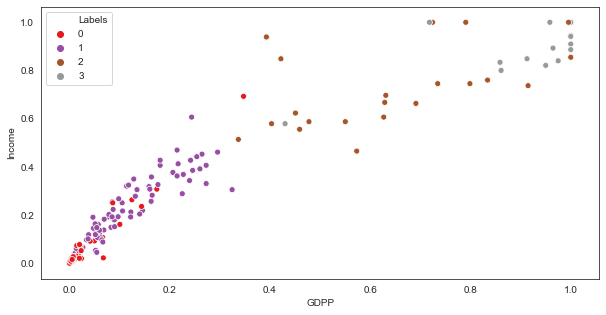

In [50]:
#plot for gdpp and income
plt.figure(figsize=[10,5])
sns.scatterplot(clust_data_scaled['GDPP'],clust_data_scaled['Income'],hue=clust_data_scaled['Labels'],palette='Set1')

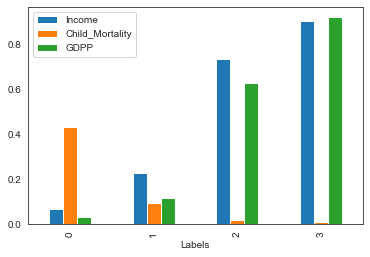

In [51]:
#cluster profiling
clust_data_scaled[['Income','Child_Mortality','GDPP','Labels']].groupby('Labels').mean().plot(kind='bar')

In [52]:
#seperating the countries with lower income, lower gdpp and higher child mortality
complete_clust=clust_data_scaled[clust_data_scaled['Labels']==0]

In [53]:
#finding bottom 5 countries
complete_clust.sort_values(['Income','GDPP','Child_Mortality'],ascending=['True','True','False']).head()

,Child_Mortality,Exports,Helath,Imports,Income,Inflation,Life_Expectancy,Total_Fer,GDPP,Labels
country,,,,,,,,,,
Liberia,0.422103,0.001282,0.004359,0.008199,0.000000,0.089456,0.398364,0.610410,0.000000,0
"Congo, Dem. Rep.",0.552093,0.003668,0.001901,0.002517,0.000000,0.231125,0.301986,0.850158,0.000049,0
Burundi,0.443038,0.000000,0.001977,0.000000,0.000458,0.152574,0.307827,0.805994,0.000000,0
Niger,0.586173,0.001754,0.000191,0.002733,0.001509,0.062471,0.339953,1.000000,0.000339,0
Central African Republic,0.712756,0.000969,0.000150,0.000550,0.003066,0.057481,0.009930,0.640379,0.002369,0


### So after the analysis by both K-Means and Hierarchical clustering we found out that both are giving the same countries which are at the bottom list which require financial aid.
Countries are:
1. Liberia
2. Congo, Dem.Republic
3. Burundi
4. Niger
5. Central African Republic
